# This Notebook contains the custom ensemble models built to improve the performance of the overall system


**SET 1 Dataset :**
- All features 
- Used 4000 records as sample data sets and trained on multiple based models(Decision Trees) - sampling with replacement
- Build a metamodel(XGBOOST) and train on it, and use the test data for performance measurement
- Used 8000 records as sample datasets to pass through base models.
- Used 2000 records as sample datasets to pass through base models.
- Used 1000 records as sample datasets to pass through base models.
- Used LGBM Model for the same setup of 4000 records as sample dataset
- Used LGBM Model for the same setup of 8000 records as sample dataset
- Used LGBM Model for the same setup of 2000 records as sample dataset
- Used LGBM Model for the same setup of 1000 records as sample dataset

**SET 2 Dataset :**
- Important Selected features 
- Used 4000 records as sample data sets and trained on multiple based models(Decision Trees) - sampling with replacement
- Build a metamodel(LGBM) and train on it, and use the test data for performance measurement
- Used LGBM Model for the same setup of 8000 records as sample dataset
- Used LGBM Model for the same setup of 2000 records as sample dataset
- Used LGBM Model for the same setup of 1000 records as sample dataset

**FINAL CONCLUSION :**
- Summary of all the custom ensemble models performance

# Required Libraries

In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
import warnings

from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
from tqdm import tqdm
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings("ignore")

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_colwidth', -1)

import warnings
warnings.simplefilter('ignore')
from tqdm import tqdm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import xgboost as xgb
from xgboost import XGBClassifier

import lightgbm as lgb
from lightgbm import LGBMModel,LGBMClassifier
from sklearn import metrics
from sklearn.metrics import fbeta_score, make_scorer

import warnings
warnings.filterwarnings('ignore')


from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
from datetime import datetime 

Matplotlib is building the font cache; this may take a moment.


ModuleNotFoundError: No module named 'sklearn.metrics.classification'

In [ ]:
from google.colab import files
files.upload()

In [6]:
!unzip Drug_Marketing1.zip -d Drug_Marketing1

Archive:  Drug_Marketing1.zip
  inflating: Drug_Marketing1/Drug_Marketing1/all_data_new.csv  


In [7]:
os.chdir('/content/Drug_Marketing1/Drug_Marketing1')
cwd=os.getcwd()
print("cwd:",cwd)

cwd: /content/Drug_Marketing1/Drug_Marketing1


In [6]:
all_data_new=pd.read_csv('/content/Drug_Marketing1/Drug_Marketing1/all_data_new.csv')
#print (all_data_new.head())

In [7]:
all_data_new.head(5)

,year_quarter,brand_prescribed,total_representative_visits,total_sample_dropped,saving_cards_dropped,vouchers_dropped,total_seminar_as_attendee,total_seminar_as_speaker,physician_hospital_affiliation,physician_in_group_practice,total_prescriptions_for_indication1,total_prescriptions_for_indication2,total_prescriptions_for_indication3,total_patient_with_commercial_insurance_plan,total_patient_with_medicare_insurance_plan,total_patient_with_medicaid_insurance_plan,brand_web_impressions,brand_ehr_impressions,brand_enews_impressions,brand_mobile_impressions,brand_organic_web_visits,brand_paidsearch_visits,total_competitor_prescription,new_prescriptions,urban_population_perc_in_physician_locality,percent_population_with_health_insurance_in_last10q,physician_gender,physician_tenure,physician_age,physician_speciality,physician_segment_ordinal
0,201903-Q3,1,9,39,0,0,1,0,0,1,46,20,28,28,76,28,2,0,1,1,1,1,165,42,0.91,0.89,M,58,83,nephrology,3
1,201904-Q4,1,4,12,0,0,0,0,0,1,43,18,32,22,72,36,1,1,1,1,1,1,169,45,0.91,0.89,M,58,83,nephrology,3
2,202001-Q1,1,14,26,0,0,1,0,0,1,53,17,37,33,80,33,4,1,0,0,1,1,198,49,0.91,0.89,M,58,83,nephrology,3
3,202002-Q2,1,18,20,0,0,1,0,0,1,45,19,38,38,67,28,7,1,0,0,1,1,170,46,0.91,0.89,M,58,83,nephrology,3
4,202003-Q3,1,5,96,0,0,0,0,0,1,48,25,40,35,75,31,7,1,0,0,0,1,169,0,0.91,0.89,M,58,83,nephrology,2


# TRAIN TEST SPLIT (80:20)

In [8]:
CLASS_LABEL ='physician_segment_ordinal'

In [9]:
print(f'\nTotal Dataset contains {all_data_new.shape[0]} samples and {all_data_new.shape[1]} variables')
features = [c for c in all_data_new.columns if c not in [CLASS_LABEL]]
print(f'\nThe dataset contains {len(features)} features and 1 CLASS LABEL')


Total Dataset contains 48703 samples and 31 variables

The dataset contains 30 features and 1 CLASS LABEL


In [10]:
category_cols= ['physician_gender', 'physician_speciality', 'year_quarter']

In [11]:
numerical_cols = [c for c in features if c not in category_cols]
#numerical_cols.remove('physician_id')
numerical_cols

['brand_prescribed',
 'total_representative_visits',
 'total_sample_dropped',
 'saving_cards_dropped',
 'vouchers_dropped',
 'total_seminar_as_attendee',
 'total_seminar_as_speaker',
 'physician_hospital_affiliation',
 'physician_in_group_practice',
 'total_prescriptions_for_indication1',
 'total_prescriptions_for_indication2',
 'total_prescriptions_for_indication3',
 'total_patient_with_commercial_insurance_plan',
 'total_patient_with_medicare_insurance_plan',
 'total_patient_with_medicaid_insurance_plan',
 'brand_web_impressions',
 'brand_ehr_impressions',
 'brand_enews_impressions',
 'brand_mobile_impressions',
 'brand_organic_web_visits',
 'brand_paidsearch_visits',
 'total_competitor_prescription',
 'new_prescriptions',
 'urban_population_perc_in_physician_locality',
 'percent_population_with_health_insurance_in_last10q',
 'physician_tenure',
 'physician_age']

In [12]:
all_data_new = pd.get_dummies(all_data_new, columns = category_cols)

In [13]:
y_class = all_data_new[CLASS_LABEL]
CLASS_LABEL ='physician_segment_ordinal'
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(all_data_new.drop(['physician_segment_ordinal'], axis=1), y_class,stratify=y_class,test_size=0.20)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

# Splitting Train into D1 and D2 (50:50)

In [14]:
X_train_D1, X_train_D2, y_train_D1, y_train_D2 = train_test_split(X_train, y_train,stratify=y_train,test_size=0.50)


In [15]:
print('Number of data points in train data D1:', X_train_D1.shape[0])
print('Number of data points in train data D2:', X_train_D2.shape[0])
print('Number of data points in test data:', X_test.shape[0])

Number of data points in train data D1: 19481
Number of data points in train data D2: 19481
Number of data points in test data: 9741


In [16]:
features = numerical_cols
autoscaler = MinMaxScaler()
#autoscaler = StandardScaler()
X_train_D1[features] = autoscaler.fit_transform(X_train_D1[features])

In [17]:
#X_cv[features] = autoscaler.transform(X_cv[features])
X_train_D2[features] = autoscaler.transform(X_train_D2[features])

In [18]:

X_test[features] = autoscaler.transform(X_test[features])

# DATA DISTRIBUTION

Text(0.5, 0, 'Class')

Text(0, 0.5, 'Data points per Class')

Text(0.5, 1.0, 'Distribution of yi in train data D1')

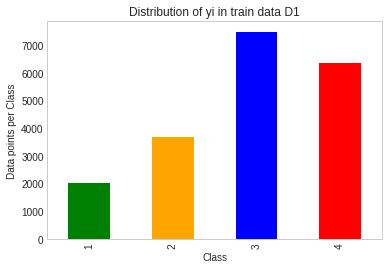

Number of data points in class 3 : 7481 ( 38.402 %)
Number of data points in class 4 : 6332 ( 32.503 %)
Number of data points in class 2 : 3666 ( 18.818 %)
Number of data points in class 1 : 2002 ( 10.277 %)


Text(0.5, 0, 'Class')

Text(0, 0.5, 'Data points per Class')

Text(0.5, 1.0, 'Distribution of yi in train data D2')

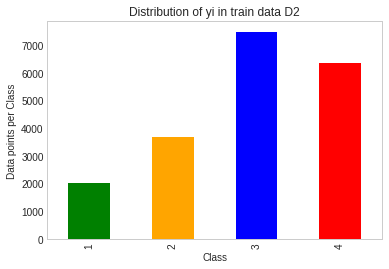

Number of data points in class 3 : 7480 ( 38.396 %)
Number of data points in class 4 : 6333 ( 32.509 %)
Number of data points in class 2 : 3666 ( 18.818 %)
Number of data points in class 1 : 2002 ( 10.277 %)
--------------------------------------------------------------------------------


Text(0.5, 0, 'Class')

Text(0, 0.5, 'Data points per Class')

Text(0.5, 1.0, 'Distribution of yi in test data')

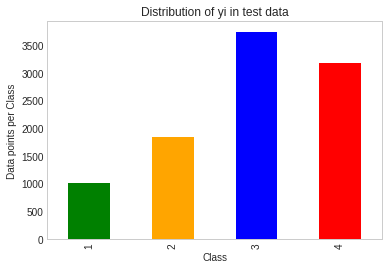

Number of data points in class 3 : 3741 ( 38.405 %)
Number of data points in class 4 : 3166 ( 32.502 %)
Number of data points in class 2 : 1833 ( 18.817 %)
Number of data points in class 1 : 1001 ( 10.276 %)


In [19]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_D1_distribution = y_train_D1.value_counts().sort_index()
train_class_D2_distribution = y_train_D2.value_counts().sort_index()
test_class_distribution = y_test.value_counts().sort_index()
#cv_class_distribution = y_cv.value_counts().sort_index()

my_colors = 'rgbkymc'
train_class_D1_distribution.plot(kind='bar',color=['green', 'orange', 'blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data D1')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_D1_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_D1_distribution.values[i], '(', np.round((train_class_D1_distribution.values[i]/y_train_D1.shape[0]*100), 3), '%)')

my_colors = 'rgbkymc'
train_class_D2_distribution.plot(kind='bar',color=['green', 'orange', 'blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data D2')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_D2_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_D2_distribution.values[i], '(', np.round((train_class_D2_distribution.values[i]/y_train_D2.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar',color=['green', 'orange', 'blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')



In [20]:
# Reference : Applied AI Course:

def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

# SET 1 DATASET AND ITS MODELING

- CODE for Sampling with Replacement on D1 Dataset - with varying samples each time

# Hyper Parameter tuning XGBOOST Model(Sample Size 4000 records - sent to each base model)

In [ ]:
# n represents no of models to be trained
import warnings
warnings.filterwarnings('ignore')
from IPython.display import clear_output 
from tqdm import tqdm
from datetime import datetime 
start = datetime.now() 
n_models=[10,50,100,250,500,1000,1500,2000,2500,3000] 
# k represents no of samples to train against each models with replacement
k_samples=4000
train_log_loss_final=[]
test_log_loss_final=[]
for i in tqdm(range(len(n_models))):
  #print('no of models now:',n_models[i])
  #print('no of samples now:',k_samples)
  meta_train_hstack=[]
  meta_test_hstack=[]
  y_train_D2_pred_list=[]
  y_test_pred_list=[]
  for j in range(1,n_models[i]+1):
    #print('creating base model no:',j)
    random_sample_cnt=k_samples
    selected_rows = list(np.random.choice(len(X_train_D1), random_sample_cnt, replace=True))
    #print(selected_rows)
    X_train_D1_subset=X_train_D1.iloc[selected_rows,:]
    y_train_D1_subset=y_train_D1.iloc[selected_rows]  
    Model=DecisionTreeClassifier(max_depth=None,random_state = 0)
    # parameterize later by selecting the dataset based on indexes
    Model.fit(X_train_D1_subset,y_train_D1_subset)
    y_train_D2_pred=Model.predict(X_train_D2)
    y_test_pred=Model.predict(X_test)
    #print(y_train_D2_pred)
    #print(type(y_train_D2_pred))
    y_train_D2_pred_list = y_train_D2_pred.tolist()
    y_test_pred_list = y_test_pred.tolist()
    #print(y_train_D2_pred_list)
    #print(type(y_train_D2_pred_list))
    #y_train_D2_pred.reshape(-1,1)
    meta_train_hstack.append(y_train_D2_pred_list)
    meta_test_hstack.append(y_test_pred_list)
    #print('len of meta_train_hstack',meta_train_hstack)
    #print('len of meta_test_hstack',meta_test_hstack)
  meta_train_hstack_final = np.array(meta_train_hstack)
  meta_train_hstack_final = meta_train_hstack_final.T
  meta_train_hstack_df = pd.DataFrame(meta_train_hstack_final) 
  meta_test_hstack_final = np.array(meta_test_hstack)
  meta_test_hstack_final = meta_test_hstack_final.T
  meta_test_hstack_df = pd.DataFrame(meta_test_hstack_final)   
  # Train meta model
  meta_model = XGBClassifier(n_jobs=-1,eval_metric='mlogloss',objective='multi:softmax',num_class=4,random_state=25)
  meta_model.fit(meta_train_hstack_df,y_train_D2)
  meta_train_pred_proba=meta_model.predict_proba(meta_train_hstack_df)
  # Predict via meta model
  meta_test_pred=meta_model.predict(meta_test_hstack_df)
  meta_test_pred_proba=meta_model.predict_proba(meta_test_hstack_df)
  train_log_loss=log_loss(y_train_D2, meta_train_pred_proba)
  test_log_loss=log_loss(y_test, meta_test_pred_proba)
  #print('train_log_loss for models',i,' is :',train_log_loss)
  #print('test_log_loss for models',i,' is :',test_log_loss)
  train_log_loss_final.append(train_log_loss)
  test_log_loss_final.append(test_log_loss)
  if (n_models[i]%2) == 0:
    clear_output()  
stop = datetime.now()
execution_time_lgb = stop-start 
execution_time_lgb    

100%|██████████| 10/10 [44:16<00:00, 265.64s/it]


datetime.timedelta(seconds=2656, microseconds=443518)

Text(0.5, 1.0, 'Comparison of all Train and Test Log loss - 4000 sample size')

Text(0.5, 0, 'No of Models')

Text(0, 0.5, 'Log Loss')

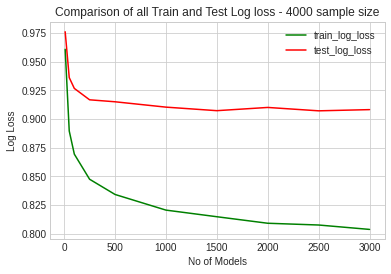

In [ ]:
plt.plot(n_models,train_log_loss_final,'g',label='train_log_loss')
plt.plot(n_models,test_log_loss_final,'r',label='test_log_loss')
plt.title('Comparison of all Train and Test Log loss - 4000 sample size')
plt.xlabel('No of Models')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

# Hyper Parameter tuning XGBOOST Model(Sample Size 8000 records - sent to each base model)

In [ ]:
# n represents no of models to be trained
import warnings
warnings.filterwarnings('ignore')
from IPython.display import clear_output 
from tqdm import tqdm
from datetime import datetime 
start = datetime.now() 
n_models=[10,50,100,250,500,1000,1500,2000,2500,3000] 
# k represents no of samples to train against each models with replacement
k_samples=8000
train_log_loss_final=[]
test_log_loss_final=[]
for i in tqdm(range(len(n_models))):
  #print('no of models now:',n_models[i])
  #print('no of samples now:',k_samples)
  meta_train_hstack=[]
  meta_test_hstack=[]
  y_train_D2_pred_list=[]
  y_test_pred_list=[]
  for j in range(1,n_models[i]+1):
    #print('creating base model no:',j)
    random_sample_cnt=k_samples
    selected_rows = list(np.random.choice(len(X_train_D1), random_sample_cnt, replace=True))
    #print(selected_rows)
    X_train_D1_subset=X_train_D1.iloc[selected_rows,:]
    y_train_D1_subset=y_train_D1.iloc[selected_rows]  
    Model=DecisionTreeClassifier(max_depth=None,random_state = 0)
    # parameterize later by selecting the dataset based on indexes
    Model.fit(X_train_D1_subset,y_train_D1_subset)
    y_train_D2_pred=Model.predict(X_train_D2)
    y_test_pred=Model.predict(X_test)
    #print(y_train_D2_pred)
    #print(type(y_train_D2_pred))
    y_train_D2_pred_list = y_train_D2_pred.tolist()
    y_test_pred_list = y_test_pred.tolist()
    #print(y_train_D2_pred_list)
    #print(type(y_train_D2_pred_list))
    #y_train_D2_pred.reshape(-1,1)
    meta_train_hstack.append(y_train_D2_pred_list)
    meta_test_hstack.append(y_test_pred_list)
    #print('len of meta_train_hstack',meta_train_hstack)
    #print('len of meta_test_hstack',meta_test_hstack)
  meta_train_hstack_final = np.array(meta_train_hstack)
  meta_train_hstack_final = meta_train_hstack_final.T
  meta_train_hstack_df = pd.DataFrame(meta_train_hstack_final) 
  meta_test_hstack_final = np.array(meta_test_hstack)
  meta_test_hstack_final = meta_test_hstack_final.T
  meta_test_hstack_df = pd.DataFrame(meta_test_hstack_final)   
  # Train meta model
  meta_model = XGBClassifier(n_jobs=-1,eval_metric='mlogloss',objective='multi:softmax',num_class=4,random_state=25)
  meta_model.fit(meta_train_hstack_df,y_train_D2)
  meta_train_pred_proba=meta_model.predict_proba(meta_train_hstack_df)
  # Predict via meta model
  meta_test_pred=meta_model.predict(meta_test_hstack_df)
  meta_test_pred_proba=meta_model.predict_proba(meta_test_hstack_df)
  train_log_loss=log_loss(y_train_D2, meta_train_pred_proba)
  test_log_loss=log_loss(y_test, meta_test_pred_proba)
  #print('train_log_loss for models',i,' is :',train_log_loss)
  #print('test_log_loss for models',i,' is :',test_log_loss)
  train_log_loss_final.append(train_log_loss)
  test_log_loss_final.append(test_log_loss)
  if (n_models[i]%2) == 0:
    clear_output()  
stop = datetime.now()
execution_time_lgb = stop-start 
execution_time_lgb    

100%|██████████| 10/10 [57:21<00:00, 344.19s/it]


datetime.timedelta(seconds=3441, microseconds=891547)

Text(0.5, 1.0, 'Comparison of all Train and Test Log loss - 8000 sample size')

Text(0.5, 0, 'No of Models')

Text(0, 0.5, 'Log Loss')

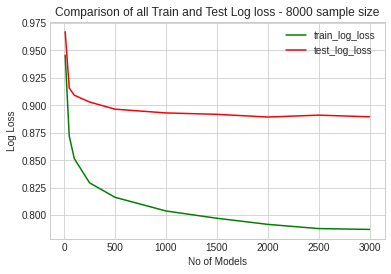

In [ ]:
plt.plot(n_models,train_log_loss_final,'g',label='train_log_loss')
plt.plot(n_models,test_log_loss_final,'r',label='test_log_loss')
plt.title('Comparison of all Train and Test Log loss - 8000 sample size')
plt.xlabel('No of Models')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

# Hyper Parameter tuning XGBOOST Model(Sample Size 2000 records - sent to each base model)

In [ ]:
# n represents no of models to be trained
import warnings
warnings.filterwarnings('ignore')
from IPython.display import clear_output 
from tqdm import tqdm
from datetime import datetime 
start = datetime.now() 
n_models=[10,50,100,250,500,1000,1500,2000,2500,3000] 
# k represents no of samples to train against each models with replacement
k_samples=2000
train_log_loss_final=[]
test_log_loss_final=[]
for i in tqdm(range(len(n_models))):
  #print('no of models now:',n_models[i])
  #print('no of samples now:',k_samples)
  meta_train_hstack=[]
  meta_test_hstack=[]
  y_train_D2_pred_list=[]
  y_test_pred_list=[]
  for j in range(1,n_models[i]+1):
    #print('creating base model no:',j)
    random_sample_cnt=k_samples
    selected_rows = list(np.random.choice(len(X_train_D1), random_sample_cnt, replace=True))
    #print(selected_rows)
    X_train_D1_subset=X_train_D1.iloc[selected_rows,:]
    y_train_D1_subset=y_train_D1.iloc[selected_rows]  
    Model=DecisionTreeClassifier(max_depth=None,random_state = 0)
    # parameterize later by selecting the dataset based on indexes
    Model.fit(X_train_D1_subset,y_train_D1_subset)
    y_train_D2_pred=Model.predict(X_train_D2)
    y_test_pred=Model.predict(X_test)
    #print(y_train_D2_pred)
    #print(type(y_train_D2_pred))
    y_train_D2_pred_list = y_train_D2_pred.tolist()
    y_test_pred_list = y_test_pred.tolist()
    #print(y_train_D2_pred_list)
    #print(type(y_train_D2_pred_list))
    #y_train_D2_pred.reshape(-1,1)
    meta_train_hstack.append(y_train_D2_pred_list)
    meta_test_hstack.append(y_test_pred_list)
    #print('len of meta_train_hstack',meta_train_hstack)
    #print('len of meta_test_hstack',meta_test_hstack)
  meta_train_hstack_final = np.array(meta_train_hstack)
  meta_train_hstack_final = meta_train_hstack_final.T
  meta_train_hstack_df = pd.DataFrame(meta_train_hstack_final) 
  meta_test_hstack_final = np.array(meta_test_hstack)
  meta_test_hstack_final = meta_test_hstack_final.T
  meta_test_hstack_df = pd.DataFrame(meta_test_hstack_final)   
  # Train meta model
  meta_model = XGBClassifier(n_jobs=-1,eval_metric='mlogloss',objective='multi:softmax',num_class=4,random_state=25)
  meta_model.fit(meta_train_hstack_df,y_train_D2)
  meta_train_pred_proba=meta_model.predict_proba(meta_train_hstack_df)
  # Predict via meta model
  meta_test_pred=meta_model.predict(meta_test_hstack_df)
  meta_test_pred_proba=meta_model.predict_proba(meta_test_hstack_df)
  train_log_loss=log_loss(y_train_D2, meta_train_pred_proba)
  test_log_loss=log_loss(y_test, meta_test_pred_proba)
  #print('train_log_loss for models',i,' is :',train_log_loss)
  #print('test_log_loss for models',i,' is :',test_log_loss)
  train_log_loss_final.append(train_log_loss)
  test_log_loss_final.append(test_log_loss)
  if (n_models[i]%2) == 0:
    clear_output()  
stop = datetime.now()
execution_time_lgb = stop-start 
execution_time_lgb    

100%|██████████| 10/10 [38:20<00:00, 230.05s/it]


datetime.timedelta(seconds=2300, microseconds=528814)

Text(0.5, 1.0, 'Comparison of all Train and Test Log loss - 2000 sample size')

Text(0.5, 0, 'No of Models')

Text(0, 0.5, 'Log Loss')

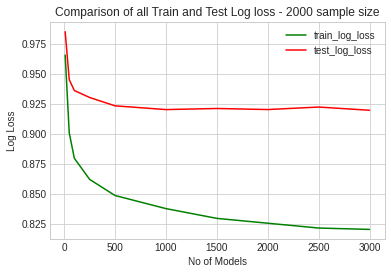

In [ ]:
plt.plot(n_models,train_log_loss_final,'g',label='train_log_loss')
plt.plot(n_models,test_log_loss_final,'r',label='test_log_loss')
plt.title('Comparison of all Train and Test Log loss - 2000 sample size')
plt.xlabel('No of Models')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

# Hyper Parameter tuning XGBOOST Model(Sample Size 1000 records - sent to each base model)

In [ ]:
# n represents no of models to be trained
import warnings
warnings.filterwarnings('ignore')
from IPython.display import clear_output 
from tqdm import tqdm
from datetime import datetime 
start = datetime.now() 
n_models=[10,50,100,250,500,1000,1500,2000,2500,3000] 
# k represents no of samples to train against each models with replacement
k_samples=1000
train_log_loss_final=[]
test_log_loss_final=[]
for i in tqdm(range(len(n_models))):
  #print('no of models now:',n_models[i])
  #print('no of samples now:',k_samples)
  meta_train_hstack=[]
  meta_test_hstack=[]
  y_train_D2_pred_list=[]
  y_test_pred_list=[]
  for j in range(1,n_models[i]+1):
    #print('creating base model no:',j)
    random_sample_cnt=k_samples
    selected_rows = list(np.random.choice(len(X_train_D1), random_sample_cnt, replace=True))
    #print(selected_rows)
    X_train_D1_subset=X_train_D1.iloc[selected_rows,:]
    y_train_D1_subset=y_train_D1.iloc[selected_rows]  
    Model=DecisionTreeClassifier(max_depth=None,random_state = 0)
    # parameterize later by selecting the dataset based on indexes
    Model.fit(X_train_D1_subset,y_train_D1_subset)
    y_train_D2_pred=Model.predict(X_train_D2)
    y_test_pred=Model.predict(X_test)
    #print(y_train_D2_pred)
    #print(type(y_train_D2_pred))
    y_train_D2_pred_list = y_train_D2_pred.tolist()
    y_test_pred_list = y_test_pred.tolist()
    #print(y_train_D2_pred_list)
    #print(type(y_train_D2_pred_list))
    #y_train_D2_pred.reshape(-1,1)
    meta_train_hstack.append(y_train_D2_pred_list)
    meta_test_hstack.append(y_test_pred_list)
    #print('len of meta_train_hstack',meta_train_hstack)
    #print('len of meta_test_hstack',meta_test_hstack)
  meta_train_hstack_final = np.array(meta_train_hstack)
  meta_train_hstack_final = meta_train_hstack_final.T
  meta_train_hstack_df = pd.DataFrame(meta_train_hstack_final) 
  meta_test_hstack_final = np.array(meta_test_hstack)
  meta_test_hstack_final = meta_test_hstack_final.T
  meta_test_hstack_df = pd.DataFrame(meta_test_hstack_final)   
  # Train meta model
  meta_model = XGBClassifier(n_jobs=-1,eval_metric='mlogloss',objective='multi:softmax',num_class=4,random_state=25)
  meta_model.fit(meta_train_hstack_df,y_train_D2)
  meta_train_pred_proba=meta_model.predict_proba(meta_train_hstack_df)
  # Predict via meta model
  meta_test_pred=meta_model.predict(meta_test_hstack_df)
  meta_test_pred_proba=meta_model.predict_proba(meta_test_hstack_df)
  train_log_loss=log_loss(y_train_D2, meta_train_pred_proba)
  test_log_loss=log_loss(y_test, meta_test_pred_proba)
  #print('train_log_loss for models',i,' is :',train_log_loss)
  #print('test_log_loss for models',i,' is :',test_log_loss)
  train_log_loss_final.append(train_log_loss)
  test_log_loss_final.append(test_log_loss)
  if (n_models[i]%2) == 0:
    clear_output()  
stop = datetime.now()
execution_time_lgb = stop-start 
execution_time_lgb    

100%|██████████| 10/10 [35:55<00:00, 215.54s/it]


datetime.timedelta(seconds=2155, microseconds=440713)

Text(0.5, 1.0, 'Comparison of all Train and Test Log loss - 1000 sample size')

Text(0.5, 0, 'No of Models')

Text(0, 0.5, 'Log Loss')

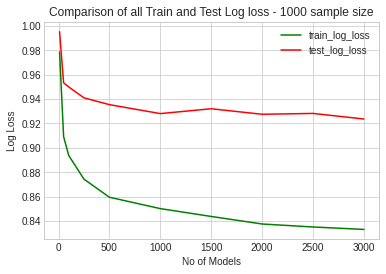

In [ ]:
plt.plot(n_models,train_log_loss_final,'g',label='train_log_loss')
plt.plot(n_models,test_log_loss_final,'r',label='test_log_loss')
plt.title('Comparison of all Train and Test Log loss - 1000 sample size')
plt.xlabel('No of Models')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

# Hyper Parameter tuning LGBM Model(Sample Size 4000 records - sent to each base model)

In [ ]:
# n represents no of models to be trained
import warnings
warnings.filterwarnings('ignore')
from IPython.display import clear_output 
from tqdm import tqdm
n_models=[10,50,100,250,500,1000,1500,2000,2500,3000] 
start = datetime.now() 
# k represents no of samples to train against each models with replacement
k_samples=4000
train_log_loss_final=[]
test_log_loss_final=[]
for i in tqdm(range(len(n_models))):
  #print('no of models now:',n_models[i])
  #print('no of samples now:',k_samples)
  meta_train_hstack=[]
  meta_test_hstack=[]
  y_train_D2_pred_list=[]
  y_test_pred_list=[]
  for j in range(1,n_models[i]+1):
    #print('creating base model no:',j)
    random_sample_cnt=k_samples
    selected_rows = list(np.random.choice(len(X_train_D1), random_sample_cnt, replace=True))
    #print(selected_rows)
    X_train_D1_subset=X_train_D1.iloc[selected_rows,:]
    y_train_D1_subset=y_train_D1.iloc[selected_rows]  
    Model=DecisionTreeClassifier(max_depth=None,random_state = 0)
    # parameterize later by selecting the dataset based on indexes
    Model.fit(X_train_D1_subset,y_train_D1_subset)
    y_train_D2_pred=Model.predict(X_train_D2)
    y_test_pred=Model.predict(X_test)
    #print(y_train_D2_pred)
    #print(type(y_train_D2_pred))
    y_train_D2_pred_list = y_train_D2_pred.tolist()
    y_test_pred_list = y_test_pred.tolist()
    #print(y_train_D2_pred_list)
    #print(type(y_train_D2_pred_list))
    #y_train_D2_pred.reshape(-1,1)
    meta_train_hstack.append(y_train_D2_pred_list)
    meta_test_hstack.append(y_test_pred_list)
    #print('len of meta_train_hstack',meta_train_hstack)
    #print('len of meta_test_hstack',meta_test_hstack)
  meta_train_hstack_final = np.array(meta_train_hstack)
  meta_train_hstack_final = meta_train_hstack_final.T
  meta_train_hstack_df = pd.DataFrame(meta_train_hstack_final) 
  meta_test_hstack_final = np.array(meta_test_hstack)
  meta_test_hstack_final = meta_test_hstack_final.T
  meta_test_hstack_df = pd.DataFrame(meta_test_hstack_final)   
  # Train meta model
  meta_model = LGBMClassifier(n_jobs=-1,eval_metric='multi_logloss',objective='multiclass',num_class=4,random_state=25)
  meta_model.fit(meta_train_hstack_df,y_train_D2)
  meta_train_pred_proba=meta_model.predict_proba(meta_train_hstack_df)
  # Predict via meta model
  meta_test_pred=meta_model.predict(meta_test_hstack_df)
  meta_test_pred_proba=meta_model.predict_proba(meta_test_hstack_df)
  train_log_loss=log_loss(y_train_D2, meta_train_pred_proba)
  test_log_loss=log_loss(y_test, meta_test_pred_proba)
  #print('train_log_loss for models',i,' is :',train_log_loss)
  #print('test_log_loss for models',i,' is :',test_log_loss)
  train_log_loss_final.append(train_log_loss)
  test_log_loss_final.append(test_log_loss)
  if (n_models[i]%2) == 0:
    clear_output()  
stop = datetime.now()
execution_time_lgb = stop-start 
execution_time_lgb



100%|██████████| 10/10 [29:26<00:00, 176.62s/it]


datetime.timedelta(seconds=1766, microseconds=167374)

Text(0.5, 1.0, 'Comparison of all Train and Test Log loss - 4000 sample size')

Text(0.5, 0, 'No of Models')

Text(0, 0.5, 'Log Loss')

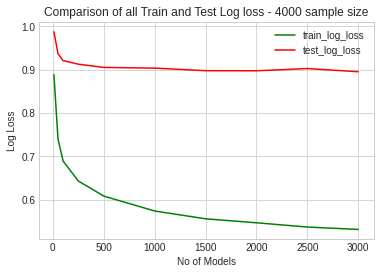

In [ ]:
plt.plot(n_models,train_log_loss_final,'g',label='train_log_loss')
plt.plot(n_models,test_log_loss_final,'r',label='test_log_loss')
plt.title('Comparison of all Train and Test Log loss - 4000 sample size')
plt.xlabel('No of Models')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

# Hyper Parameter tuning LGBM Model(Sample Size 8000 records - sent to each base model)

In [ ]:
# n represents no of models to be trained
import warnings
warnings.filterwarnings('ignore')
from IPython.display import clear_output 
from tqdm import tqdm
n_models=[10,50,100,250,500,1000,1500,2000,2500,3000] 
start = datetime.now() 
# k represents no of samples to train against each models with replacement
k_samples=8000
train_log_loss_final=[]
test_log_loss_final=[]
for i in tqdm(range(len(n_models))):
  #print('no of models now:',n_models[i])
  #print('no of samples now:',k_samples)
  meta_train_hstack=[]
  meta_test_hstack=[]
  y_train_D2_pred_list=[]
  y_test_pred_list=[]
  for j in range(1,n_models[i]+1):
    #print('creating base model no:',j)
    random_sample_cnt=k_samples
    selected_rows = list(np.random.choice(len(X_train_D1), random_sample_cnt, replace=True))
    #print(selected_rows)
    X_train_D1_subset=X_train_D1.iloc[selected_rows,:]
    y_train_D1_subset=y_train_D1.iloc[selected_rows]  
    Model=DecisionTreeClassifier(max_depth=None,random_state = 0)
    # parameterize later by selecting the dataset based on indexes
    Model.fit(X_train_D1_subset,y_train_D1_subset)
    y_train_D2_pred=Model.predict(X_train_D2)
    y_test_pred=Model.predict(X_test)
    #print(y_train_D2_pred)
    #print(type(y_train_D2_pred))
    y_train_D2_pred_list = y_train_D2_pred.tolist()
    y_test_pred_list = y_test_pred.tolist()
    #print(y_train_D2_pred_list)
    #print(type(y_train_D2_pred_list))
    #y_train_D2_pred.reshape(-1,1)
    meta_train_hstack.append(y_train_D2_pred_list)
    meta_test_hstack.append(y_test_pred_list)
    #print('len of meta_train_hstack',meta_train_hstack)
    #print('len of meta_test_hstack',meta_test_hstack)
  meta_train_hstack_final = np.array(meta_train_hstack)
  meta_train_hstack_final = meta_train_hstack_final.T
  meta_train_hstack_df = pd.DataFrame(meta_train_hstack_final) 
  meta_test_hstack_final = np.array(meta_test_hstack)
  meta_test_hstack_final = meta_test_hstack_final.T
  meta_test_hstack_df = pd.DataFrame(meta_test_hstack_final)   
  # Train meta model
  meta_model = LGBMClassifier(n_jobs=-1,eval_metric='multi_logloss',objective='multiclass',num_class=4,random_state=25)
  meta_model.fit(meta_train_hstack_df,y_train_D2)
  meta_train_pred_proba=meta_model.predict_proba(meta_train_hstack_df)
  # Predict via meta model
  meta_test_pred=meta_model.predict(meta_test_hstack_df)
  meta_test_pred_proba=meta_model.predict_proba(meta_test_hstack_df)
  train_log_loss=log_loss(y_train_D2, meta_train_pred_proba)
  test_log_loss=log_loss(y_test, meta_test_pred_proba)
  #print('train_log_loss for models',i,' is :',train_log_loss)
  #print('test_log_loss for models',i,' is :',test_log_loss)
  train_log_loss_final.append(train_log_loss)
  test_log_loss_final.append(test_log_loss)
  if (n_models[i]%2) == 0:
    clear_output()  
stop = datetime.now()
execution_time_lgb = stop-start 
execution_time_lgb

100%|██████████| 10/10 [38:20<00:00, 230.08s/it]


datetime.timedelta(seconds=2300, microseconds=828647)

Text(0.5, 1.0, 'Comparison of all Train and Test Log loss - 8000 sample size')

Text(0.5, 0, 'No of Models')

Text(0, 0.5, 'Log Loss')

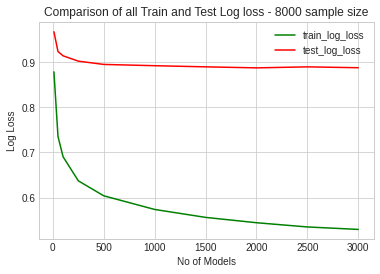

In [ ]:
plt.plot(n_models,train_log_loss_final,'g',label='train_log_loss')
plt.plot(n_models,test_log_loss_final,'r',label='test_log_loss')
plt.title('Comparison of all Train and Test Log loss - 8000 sample size')
plt.xlabel('No of Models')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

# Hyper Parameter tuning LGBM Model(Sample Size 2000 records - sent to each base model)

In [ ]:
# n represents no of models to be trained
import warnings
warnings.filterwarnings('ignore')
from IPython.display import clear_output 
from tqdm import tqdm
n_models=[10,50,100,250,500,1000,1500,2000,2500,3000] 
start = datetime.now() 
# k represents no of samples to train against each models with replacement
k_samples=2000
train_log_loss_final=[]
test_log_loss_final=[]
for i in tqdm(range(len(n_models))):
  #print('no of models now:',n_models[i])
  #print('no of samples now:',k_samples)
  meta_train_hstack=[]
  meta_test_hstack=[]
  y_train_D2_pred_list=[]
  y_test_pred_list=[]
  for j in range(1,n_models[i]+1):
    #print('creating base model no:',j)
    random_sample_cnt=k_samples
    selected_rows = list(np.random.choice(len(X_train_D1), random_sample_cnt, replace=True))
    #print(selected_rows)
    X_train_D1_subset=X_train_D1.iloc[selected_rows,:]
    y_train_D1_subset=y_train_D1.iloc[selected_rows]  
    Model=DecisionTreeClassifier(max_depth=None,random_state = 0)
    # parameterize later by selecting the dataset based on indexes
    Model.fit(X_train_D1_subset,y_train_D1_subset)
    y_train_D2_pred=Model.predict(X_train_D2)
    y_test_pred=Model.predict(X_test)
    #print(y_train_D2_pred)
    #print(type(y_train_D2_pred))
    y_train_D2_pred_list = y_train_D2_pred.tolist()
    y_test_pred_list = y_test_pred.tolist()
    #print(y_train_D2_pred_list)
    #print(type(y_train_D2_pred_list))
    #y_train_D2_pred.reshape(-1,1)
    meta_train_hstack.append(y_train_D2_pred_list)
    meta_test_hstack.append(y_test_pred_list)
    #print('len of meta_train_hstack',meta_train_hstack)
    #print('len of meta_test_hstack',meta_test_hstack)
  meta_train_hstack_final = np.array(meta_train_hstack)
  meta_train_hstack_final = meta_train_hstack_final.T
  meta_train_hstack_df = pd.DataFrame(meta_train_hstack_final) 
  meta_test_hstack_final = np.array(meta_test_hstack)
  meta_test_hstack_final = meta_test_hstack_final.T
  meta_test_hstack_df = pd.DataFrame(meta_test_hstack_final)   
  # Train meta model
  meta_model = LGBMClassifier(n_jobs=-1,eval_metric='multi_logloss',objective='multiclass',num_class=4,random_state=25)
  meta_model.fit(meta_train_hstack_df,y_train_D2)
  meta_train_pred_proba=meta_model.predict_proba(meta_train_hstack_df)
  # Predict via meta model
  meta_test_pred=meta_model.predict(meta_test_hstack_df)
  meta_test_pred_proba=meta_model.predict_proba(meta_test_hstack_df)
  train_log_loss=log_loss(y_train_D2, meta_train_pred_proba)
  test_log_loss=log_loss(y_test, meta_test_pred_proba)
  #print('train_log_loss for models',i,' is :',train_log_loss)
  #print('test_log_loss for models',i,' is :',test_log_loss)
  train_log_loss_final.append(train_log_loss)
  test_log_loss_final.append(test_log_loss)
  if (n_models[i]%2) == 0:
    clear_output()  
stop = datetime.now()
execution_time_lgb = stop-start 
execution_time_lgb

100%|██████████| 10/10 [19:52<00:00, 119.23s/it]


datetime.timedelta(seconds=1192, microseconds=341979)

Text(0.5, 1.0, 'Comparison of all Train and Test Log loss - 2000 sample size')

Text(0.5, 0, 'No of Models')

Text(0, 0.5, 'Log Loss')

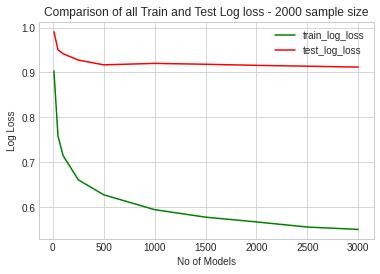

In [ ]:
plt.plot(n_models,train_log_loss_final,'g',label='train_log_loss')
plt.plot(n_models,test_log_loss_final,'r',label='test_log_loss')
plt.title('Comparison of all Train and Test Log loss - 2000 sample size')
plt.xlabel('No of Models')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

# Hyper Parameter tuning LGBM Model(Sample Size 1000 records - sent to each base model)

In [21]:
# n represents no of models to be trained
import warnings
warnings.filterwarnings('ignore')
from IPython.display import clear_output 
from tqdm import tqdm
n_models=[10,50,100,250,500,1000,1500,2000,2500,3000] 
start = datetime.now() 
# k represents no of samples to train against each models with replacement
k_samples=1000
train_log_loss_final=[]
test_log_loss_final=[]
for i in tqdm(range(len(n_models))):
  #print('no of models now:',n_models[i])
  #print('no of samples now:',k_samples)
  meta_train_hstack=[]
  meta_test_hstack=[]
  y_train_D2_pred_list=[]
  y_test_pred_list=[]
  for j in range(1,n_models[i]+1):
    #print('creating base model no:',j)
    random_sample_cnt=k_samples
    selected_rows = list(np.random.choice(len(X_train_D1), random_sample_cnt, replace=True))
    #print(selected_rows)
    X_train_D1_subset=X_train_D1.iloc[selected_rows,:]
    y_train_D1_subset=y_train_D1.iloc[selected_rows]  
    Model=DecisionTreeClassifier(max_depth=None,random_state = 0)
    # parameterize later by selecting the dataset based on indexes
    Model.fit(X_train_D1_subset,y_train_D1_subset)
    y_train_D2_pred=Model.predict(X_train_D2)
    y_test_pred=Model.predict(X_test)
    #print(y_train_D2_pred)
    #print(type(y_train_D2_pred))
    y_train_D2_pred_list = y_train_D2_pred.tolist()
    y_test_pred_list = y_test_pred.tolist()
    #print(y_train_D2_pred_list)
    #print(type(y_train_D2_pred_list))
    #y_train_D2_pred.reshape(-1,1)
    meta_train_hstack.append(y_train_D2_pred_list)
    meta_test_hstack.append(y_test_pred_list)
    #print('len of meta_train_hstack',meta_train_hstack)
    #print('len of meta_test_hstack',meta_test_hstack)
  meta_train_hstack_final = np.array(meta_train_hstack)
  meta_train_hstack_final = meta_train_hstack_final.T
  meta_train_hstack_df = pd.DataFrame(meta_train_hstack_final) 
  meta_test_hstack_final = np.array(meta_test_hstack)
  meta_test_hstack_final = meta_test_hstack_final.T
  meta_test_hstack_df = pd.DataFrame(meta_test_hstack_final)   
  # Train meta model
  meta_model = LGBMClassifier(n_jobs=-1,eval_metric='multi_logloss',objective='multiclass',num_class=4,random_state=25)
  meta_model.fit(meta_train_hstack_df,y_train_D2)
  meta_train_pred_proba=meta_model.predict_proba(meta_train_hstack_df)
  # Predict via meta model
  meta_test_pred=meta_model.predict(meta_test_hstack_df)
  meta_test_pred_proba=meta_model.predict_proba(meta_test_hstack_df)
  train_log_loss=log_loss(y_train_D2, meta_train_pred_proba)
  test_log_loss=log_loss(y_test, meta_test_pred_proba)
  #print('train_log_loss for models',i,' is :',train_log_loss)
  #print('test_log_loss for models',i,' is :',test_log_loss)
  train_log_loss_final.append(train_log_loss)
  test_log_loss_final.append(test_log_loss)
  if (n_models[i]%2) == 0:
    clear_output()  
stop = datetime.now()
execution_time_lgb = stop-start 
execution_time_lgb

100%|██████████| 10/10 [13:41<00:00, 82.17s/it] 


datetime.timedelta(seconds=821, microseconds=700386)

In [23]:
best_test_log_loss_final = min(test_log_loss_final)
best_test_log_loss_index = test_log_loss_final.index(best_test_log_loss_final)

best_estimator=n_models[best_test_log_loss_index ]
print('best test log loss:',best_test_log_loss_final)
print('best estimators:',best_estimator)

best test log loss: 0.9218243430722698
best estimators: 3000


Text(0.5, 1.0, 'Comparison of all Train and Test Log loss - 1000 sample size')

Text(0.5, 0, 'No of Models')

Text(0, 0.5, 'Log Loss')

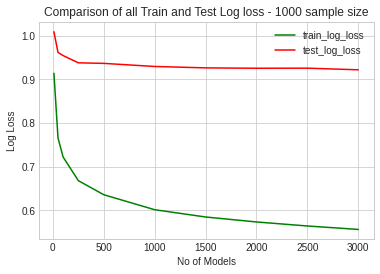

In [24]:
plt.plot(n_models,train_log_loss_final,'g',label='train_log_loss')
plt.plot(n_models,test_log_loss_final,'r',label='test_log_loss')
plt.title('Comparison of all Train and Test Log loss - 1000 sample size')
plt.xlabel('No of Models')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

# USING SELECTED FEATURES AND USING CUSTOM ENSEMBLING 

In [21]:
all_data_new_fts=pd.read_csv('/content/Drug_Marketing1/Drug_Marketing1/all_data_new.csv')

In [22]:
CLASS_LABEL ='physician_segment_ordinal'

In [23]:
print(f'\nTotal Dataset contains {all_data_new_fts.shape[0]} samples and {all_data_new_fts.shape[1]} variables')
features = [c for c in all_data_new_fts.columns if c not in [CLASS_LABEL]]
print(f'\nThe dataset contains {len(features)} features and 1 CLASS LABEL')


Total Dataset contains 48703 samples and 31 variables

The dataset contains 30 features and 1 CLASS LABEL


In [24]:
category_cols= ['physician_gender', 'physician_speciality', 'year_quarter']

In [25]:
all_data_new_fts.drop(['saving_cards_dropped','vouchers_dropped','total_seminar_as_attendee','total_seminar_as_speaker'
,'total_prescriptions_for_indication3','brand_web_impressions','brand_ehr_impressions','brand_enews_impressions','brand_mobile_impressions'
,'brand_organic_web_visits','brand_paidsearch_visits','urban_population_perc_in_physician_locality','percent_population_with_health_insurance_in_last10q'
,'physician_tenure','physician_age'], axis = 1,inplace = True)

In [26]:
all_data_new_fts.head(5)

,year_quarter,brand_prescribed,total_representative_visits,total_sample_dropped,physician_hospital_affiliation,physician_in_group_practice,total_prescriptions_for_indication1,total_prescriptions_for_indication2,total_patient_with_commercial_insurance_plan,total_patient_with_medicare_insurance_plan,total_patient_with_medicaid_insurance_plan,total_competitor_prescription,new_prescriptions,physician_gender,physician_speciality,physician_segment_ordinal
0,201903-Q3,1,9,39,0,1,46,20,28,76,28,165,42,M,nephrology,3
1,201904-Q4,1,4,12,0,1,43,18,22,72,36,169,45,M,nephrology,3
2,202001-Q1,1,14,26,0,1,53,17,33,80,33,198,49,M,nephrology,3
3,202002-Q2,1,18,20,0,1,45,19,38,67,28,170,46,M,nephrology,3
4,202003-Q3,1,5,96,0,1,48,25,35,75,31,169,0,M,nephrology,2


In [27]:
features = [c for c in all_data_new_fts.columns if c not in [CLASS_LABEL]]
features

['year_quarter',
 'brand_prescribed',
 'total_representative_visits',
 'total_sample_dropped',
 'physician_hospital_affiliation',
 'physician_in_group_practice',
 'total_prescriptions_for_indication1',
 'total_prescriptions_for_indication2',
 'total_patient_with_commercial_insurance_plan',
 'total_patient_with_medicare_insurance_plan',
 'total_patient_with_medicaid_insurance_plan',
 'total_competitor_prescription',
 'new_prescriptions',
 'physician_gender',
 'physician_speciality']

In [28]:
all_data_new_fts = pd.get_dummies(all_data_new_fts, columns = category_cols)

# Splitting Train into D1 and D2 (50:50)

In [29]:
y_class = all_data_new_fts[CLASS_LABEL]
CLASS_LABEL ='physician_segment_ordinal'
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(all_data_new_fts.drop(['physician_segment_ordinal'], axis=1), y_class,stratify=y_class,test_size=0.20)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [30]:
X_train_D1, X_train_D2, y_train_D1, y_train_D2 = train_test_split(X_train, y_train,stratify=y_train,test_size=0.50)


In [31]:
print('Number of data points in train data D1:', X_train_D1.shape[0])
print('Number of data points in train data D2:', X_train_D2.shape[0])
print('Number of data points in test data:', X_test.shape[0])

Number of data points in train data D1: 19481
Number of data points in train data D2: 19481
Number of data points in test data: 9741


In [32]:
numerical_cols=['total_representative_visits',
 'total_sample_dropped',
 'total_prescriptions_for_indication1',
 'total_prescriptions_for_indication2',
 'total_patient_with_commercial_insurance_plan',
 'total_patient_with_medicare_insurance_plan',
 'total_patient_with_medicaid_insurance_plan',
 'total_competitor_prescription',
 'new_prescriptions']

In [33]:
features = numerical_cols
autoscaler = MinMaxScaler()
#autoscaler = StandardScaler()
X_train_D1[features] = autoscaler.fit_transform(X_train_D1[features])

In [34]:
#X_cv[features] = autoscaler.transform(X_cv[features])
X_train_D2[features] = autoscaler.transform(X_train_D2[features])

In [35]:

X_test[features] = autoscaler.transform(X_test[features])

In [36]:
# Reference : Applied AI Course:

def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

# SET 2 DATASET AND ITS MODELING

- It also has Sampling with replacement strategy with different no of samples

# Hyper Parameter tuning LGBM Model for selected features only (Sample Size 8000 records - sent to each base model)

In [37]:
# n represents no of models to be trained
import warnings
warnings.filterwarnings('ignore')
from IPython.display import clear_output 
from tqdm import tqdm
#n_models=[10,50,100,250,500,1000,1500,2000,2500,3000] 
start = datetime.now() 
# k represents no of samples to train against each models with replacement
#k_samples=8000
def custom_ensemble_lgbm(in_n_models,in_k_samples,in_X_train_D1,in_X_train_D2,in_X_test,in_y_train_D1,in_y_train_D2,in_y_test):
  train_log_loss_final=[]
  test_log_loss_final=[]
  for i in tqdm(range(len(in_n_models))):
    #print('no of models now:',n_models[i])
    #print('no of samples now:',k_samples)
    meta_train_hstack=[]
    meta_test_hstack=[]
    y_train_D2_pred_list=[]
    y_test_pred_list=[]
    for j in range(1,in_n_models[i]+1):
      #print('creating base model no:',j)
      random_sample_cnt=in_k_samples
      selected_rows = list(np.random.choice(len(in_X_train_D1), random_sample_cnt, replace=True))
      #print(selected_rows)
      X_train_D1_subset=in_X_train_D1.iloc[selected_rows,:]
      y_train_D1_subset=in_y_train_D1.iloc[selected_rows]  
      Model=DecisionTreeClassifier(max_depth=None,random_state = 0)
      # parameterize later by selecting the dataset based on indexes
      Model.fit(X_train_D1_subset,y_train_D1_subset)
      y_train_D2_pred=Model.predict(in_X_train_D2)
      y_test_pred=Model.predict(in_X_test)
      #print(y_train_D2_pred)
      #print(type(y_train_D2_pred))
      y_train_D2_pred_list = y_train_D2_pred.tolist()
      y_test_pred_list = y_test_pred.tolist()
      #print(y_train_D2_pred_list)
      #print(type(y_train_D2_pred_list))
      #y_train_D2_pred.reshape(-1,1)
      meta_train_hstack.append(y_train_D2_pred_list)
      meta_test_hstack.append(y_test_pred_list)
      #print('len of meta_train_hstack',meta_train_hstack)
      #print('len of meta_test_hstack',meta_test_hstack)
    meta_train_hstack_final = np.array(meta_train_hstack)
    meta_train_hstack_final = meta_train_hstack_final.T
    meta_train_hstack_df = pd.DataFrame(meta_train_hstack_final) 
    meta_test_hstack_final = np.array(meta_test_hstack)
    meta_test_hstack_final = meta_test_hstack_final.T
    meta_test_hstack_df = pd.DataFrame(meta_test_hstack_final)   
    # Train meta model
    meta_model = LGBMClassifier(n_jobs=-1,eval_metric='multi_logloss',objective='multiclass',num_class=4,random_state=25)
    meta_model.fit(meta_train_hstack_df,y_train_D2)
    meta_train_pred_proba=meta_model.predict_proba(meta_train_hstack_df)
    # Predict via meta model
    meta_test_pred=meta_model.predict(meta_test_hstack_df)
    meta_test_pred_proba=meta_model.predict_proba(meta_test_hstack_df)
    train_log_loss=log_loss(in_y_train_D2, meta_train_pred_proba)
    test_log_loss=log_loss(in_y_test, meta_test_pred_proba)
    #print('train_log_loss for models',i,' is :',train_log_loss)
    #print('test_log_loss for models',i,' is :',test_log_loss)
    train_log_loss_final.append(train_log_loss)
    test_log_loss_final.append(test_log_loss)
    if (in_n_models[i]%2) == 0:
      clear_output()  
  return train_log_loss_final, test_log_loss_final
stop = datetime.now()
execution_time_lgb = stop-start 
execution_time_lgb

datetime.timedelta(microseconds=360)

- Running re-usable function

In [38]:
n_models=[10,50,100,250,500,1000,1500,2000,2500,3000] 
k_samples=8000
start = datetime.now() 
train_log_loss_final, test_log_loss_final=custom_ensemble_lgbm(n_models,k_samples,X_train_D1,X_train_D2,X_test,y_train_D1,y_train_D2,y_test)
execution_time_lgb = stop-start 
execution_time_lgb

100%|██████████| 10/10 [25:10<00:00, 151.01s/it]


Text(0.5, 1.0, 'Comparison of all Train and Test Log loss - 8000 sample size')

Text(0.5, 0, 'No of Models')

Text(0, 0.5, 'Log Loss')

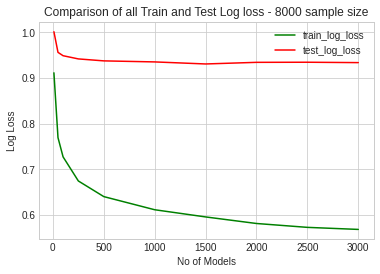

In [39]:
plt.plot(n_models,train_log_loss_final,'g',label='train_log_loss')
plt.plot(n_models,test_log_loss_final,'r',label='test_log_loss')
plt.title('Comparison of all Train and Test Log loss - 8000 sample size')
plt.xlabel('No of Models')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

# Hyper Parameter tuning LGBM Model for selected features only (Sample Size 4000 records - sent to each base model)

In [40]:
n_models=[10,50,100,250,500,1000,1500,2000,2500,3000] 
k_samples==4000
start = datetime.now() 
train_log_loss_final, test_log_loss_final=custom_ensemble_lgbm(n_models,k_samples,X_train_D1,X_train_D2,X_test,y_train_D1,y_train_D2,y_test)
execution_time_lgb = stop-start 
execution_time_lgb

100%|██████████| 10/10 [25:09<00:00, 150.96s/it]


datetime.timedelta(days=-1, seconds=84602, microseconds=700885)

Text(0.5, 1.0, 'Comparison of all Train and Test Log loss - 4000 sample size')

Text(0.5, 0, 'No of Models')

Text(0, 0.5, 'Log Loss')

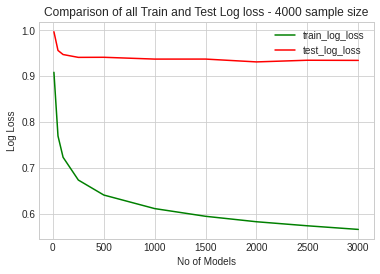

In [42]:
plt.plot(n_models,train_log_loss_final,'g',label='train_log_loss')
plt.plot(n_models,test_log_loss_final,'r',label='test_log_loss')
plt.title('Comparison of all Train and Test Log loss - 4000 sample size')
plt.xlabel('No of Models')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

# Hyper Parameter tuning LGBM Model for selected features only (Sample Size 2000 records - sent to each base model)

In [43]:
n_models=[10,50,100,250,500,1000,1500,2000,2500,3000] 
k_samples=2000
start = datetime.now() 
train_log_loss_final, test_log_loss_final=custom_ensemble_lgbm(n_models,k_samples,X_train_D1,X_train_D2,X_test,y_train_D1,y_train_D2,y_test)
execution_time_lgb = stop-start 
execution_time_lgb

100%|██████████| 10/10 [13:28<00:00, 80.83s/it] 


datetime.timedelta(days=-1, seconds=83023, microseconds=271305)

Text(0.5, 1.0, 'Comparison of all Train and Test Log loss - 2000 sample size')

Text(0.5, 0, 'No of Models')

Text(0, 0.5, 'Log Loss')

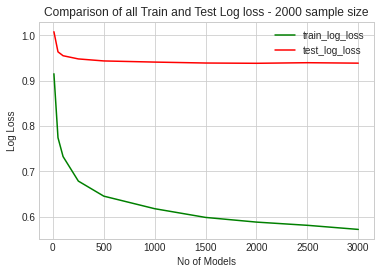

In [44]:
plt.plot(n_models,train_log_loss_final,'g',label='train_log_loss')
plt.plot(n_models,test_log_loss_final,'r',label='test_log_loss')
plt.title('Comparison of all Train and Test Log loss - 2000 sample size')
plt.xlabel('No of Models')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

# Hyper Parameter tuning LGBM Model for selected features only (Sample Size 1000 records - sent to each base model)

In [45]:
n_models=[10,50,100,250,500,1000,1500,2000,2500,3000] 
k_samples=1000
start = datetime.now() 
train_log_loss_final, test_log_loss_final=custom_ensemble_lgbm(n_models,k_samples,X_train_D1,X_train_D2,X_test,y_train_D1,y_train_D2,y_test)
execution_time_lgb = stop-start 
execution_time_lgb

100%|██████████| 10/10 [11:24<00:00, 68.46s/it] 


datetime.timedelta(days=-1, seconds=82194, microseconds=285440)

Text(0.5, 1.0, 'Comparison of all Train and Test Log loss - 1000 sample size')

Text(0.5, 0, 'No of Models')

Text(0, 0.5, 'Log Loss')

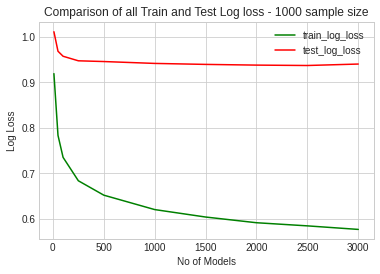

In [46]:
plt.plot(n_models,train_log_loss_final,'g',label='train_log_loss')
plt.plot(n_models,test_log_loss_final,'r',label='test_log_loss')
plt.title('Comparison of all Train and Test Log loss - 1000 sample size')
plt.xlabel('No of Models')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

# FINAL SUMMARY OF ALL CUSTOM MODELS BASED ON LOG LOSS GRAPHS 

In [3]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Feature Set", "Model","No of Base models","No of Samples", "Eval Metric","Train Loss","Test Loss"]
x.add_row(["-------------------------","------------------","----","----","----","----","----"])
x.add_row(["-----***************-----",  "-----*******------","****","****","****","****","****"])
x.add_row(["DATASET-1-ALL FEATURES",  "XGBOOST",1000,8000,"LOG LOSS",0.78,0.88])
x.add_row(["-----***************-----",  "-----*******------","****","****","****","****","****"])
x.add_row(["DATASET-1-ALL FEATURES",  "XGBOOST",1500,4000,"LOG LOSS",0.81,0.91])
x.add_row(["DATASET-1-ALL FEATURES",  "XGBOOST",500,2000,"LOG LOSS",0.85,0.92])
x.add_row(["DATASET-1-ALL FEATURES",  "XGBOOST",3000,1000,"LOG LOSS",0.83,0.92])
x.add_row(["-------------------------","------------------","----","----","----","----","----"])
x.add_row(["DATASET-1-ALL FEATURES",  "LGBM",1000,8000,"LOG LOSS",0.57,0.89])
x.add_row(["DATASET-1-ALL FEATURES",  "LGBM",500,4000,"LOG LOSS",0.6,0.9])
x.add_row(["DATASET-1-ALL FEATURES",  "LGBM",500,2000,"LOG LOSS",0.63,0.91])
x.add_row(["DATASET-1-ALL FEATURES",  "LGBM",1000,1000,"LOG LOSS",0.6,0.93])
x.add_row(["-------------------------","------------------","----","----","----","----","----"])
x.add_row(["DATASET-2-SELECTED FEATURES",  "LGBM",1000,8000,"LOG LOSS",0.56,0.94])
x.add_row(["DATASET-2-SELECTED FEATURES",  "LGBM",1000,4000,"LOG LOSS",0.61,0.94])
x.add_row(["DATASET-2-SELECTED FEATURES",  "LGBM",500,2000,"LOG LOSS",0.65,0.95])
x.add_row(["DATASET-2-SELECTED FEATURES",  "LGBM",1000,1000,"LOG LOSS",0.62,0.95])
x.add_row(["-------------------------","------------------","----","----","----","----","----"])
print(x)

ModuleNotFoundError: No module named 'prettytable'

# WE CONCLUDE THAT USING XGBOOST AS METAMODEL AND No of Base Models = 1000, and Sample Size = 8000 we are able to achieve a LOG LOSS of 0.88